In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# Load data
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

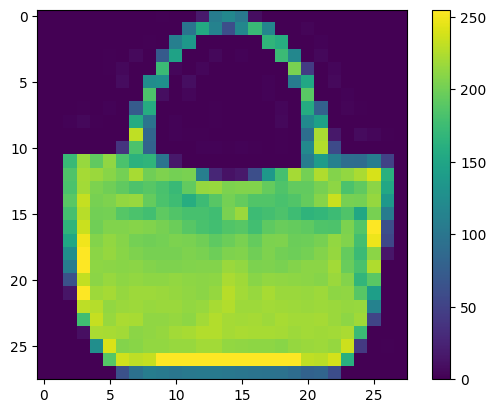

In [4]:
# Plot the images from the dataset
plt.imshow(training_images[100])
plt.colorbar()
plt.show()

In [5]:
# Normalizing the images
training_images = training_images/255.0
test_images = test_images/255.0

In [6]:
# Computer vision neural network
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])

model.summary()

2025-06-12 21:15:13.158683: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-06-12 21:15:13.158858: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-12 21:15:13.158879: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-06-12 21:15:13.159148: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-12 21:15:13.159162: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Creating a call back class
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['loss']<0.45 or logs['accuracy']>0.84:
            self.model.stop_training = True

In [ ]:
# Model compilation and training

model.compile(optimizer= tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, callbacks=[myCallBack()])

Epoch 1/5


In [8]:
# Evaluate the model
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8290 - loss: 0.5246


[0.5487017035484314, 0.821399986743927]